## Exercise 4

Dado o modelo de espaço de estados em

$$
\begin{cases}
   \begin{bmatrix} \dot{x_1(t)} \\ \dot{x_2(t)} \end{bmatrix} = \begin{bmatrix} 0 & 1 \\ -5 & -2 \end{bmatrix}\begin{bmatrix} x_1(t) \\ x_2(t) \end{bmatrix} + \begin{bmatrix} 0 \\ 2 \end{bmatrix}u(t) \\
   y(t) = \begin{bmatrix} 0 & 1 \end{bmatrix} \begin{bmatrix} x_1(t) \\ x_2(t) \end{bmatrix} + u(t)
\end{cases}
$$

1. Encontre a função de transferência correspondente $G(s) = Y(s)/U(s)$
2. Encontre um modelo de entrada-saída equivalente ao modelo de espaço de estado
3. Encontre a evolução forçada de estado e saída como resposta da entrada $u(t) = e^{-3t}$

## Parte 1

1. Encontre a função de transferência correspondente $G(s) = Y(s)/U(s)$

A função de transferência pode ser dada por:

$$
G(s) = \frac{Y(s)}{U(s)} = C(sI - A)^{-1}B + D
$$

Onde:

$$
A = \begin{bmatrix} 0 & 1 \\ -5 & -2 \end{bmatrix}; \ B = \begin{bmatrix} 0 \\ 2 \end{bmatrix}; \ C = \begin{bmatrix} 0 & 1 \end{bmatrix}; \ D = 1 \\ sI - A)^{-1} = \frac{adj(sI - A)}{det(sI - A)}
$$

Logo:

$$
sI - A = s\begin{bmatrix} 1 & 10\\ 0 & 1 \end{bmatrix} - \begin{bmatrix} 0 & 1 \\ -5 & -2 \end{bmatrix} = \begin{bmatrix} s & -1 \\ 5 & 2 + s \end{bmatrix} \\
\therefore adj(sI - A) = \begin{bmatrix} s + 2 & -5 \\ 1 & s \end{bmatrix} \\
\therefore det(sI - A) = s(2 + s) + 5 = s² + 2s + 5 \\
$$

Então, podemo escrever $G(s)$ como:

$$
G(s) = \frac{\begin{bmatrix} 0 & 1 \end{bmatrix}\begin{bmatrix} s + 2 & -5 \\ 1 & s \end{bmatrix}\begin{bmatrix} 0 \\ 2 \end{bmatrix}}{s² + 2s + 5} + 1 \\
\therefore G(s) = \frac{\begin{bmatrix} 1 & s \end{bmatrix}\begin{bmatrix} 0 \\ 2 \end{bmatrix}}{s² + 2s + 5} \\
\therefore G(s) = \frac{25}{s² + 2s + 5} + 1 \\
\therefore G(s) = \frac{s² + 4s + 5}{s² + 2s + 5} = \frac{Y(s)}{U(s)}
$$

Em python, podemos criar um sistema no espaço de estados com a função `ct.ss()` da biblioteca `control`. Para isso, devemos definir nossas matrizes:

In [2]:
import numpy as np
import control as ct
import matplotlib.pyplot as plt

A = [[0, 1],[-5, -2]]
B = [[0], [2]]
C = [[0, 1]]
D = [[1]]

Sys = ct.ss(A, B, C, D)

Sys

StateSpace(array([[ 0.,  1.],
       [-5., -2.]]), array([[0.],
       [2.]]), array([[0., 1.]]), array([[1.]]))

Agora, podemos usar a função `ct.ss2tf()` para achar a função de transferência do nosso sistema:

In [3]:
G = ct.ss2tf(Sys)

G

TransferFunction(array([1., 4., 5.]), array([1., 2., 5.]))

Achamos uma função de transferência equivalente.

## Parte 2

2. Encontre um modelo de entrada-saída equivalente ao modelo de espaço de estado

Com a função de transferência em mãos, podemos simplesmente multiplicar os meios e os extremos achando a seguinte expressão:

$$
(s² + 2s + 5)Y(s) = (s² + 4s + 5)U(s) \\
$$

Aplicando a inversa de laplace, temos:

$$
\therefore \ddot{y}(t) + 2\dot{y}(t) +5y(t) = \ddot{u}(t) + 4\dot{u}(t)
$$

E esse é nosso modelo de entrada e saída.

Em python, poderíamos usar a função `ct.tf2io()` da biblioteca `control`, mas essa função foi descuntinuada na versão mais atual da biblioteca.

## Parte 3

3. Encontre a evolução forçada de estado e saída como resposta da entrada $u(t) = e^{-3t}$

Para isso, vamos achar $U(s)$ aplicando a transformada de laplace em $u(t)$:

$$
\mathcal{L}[ e^{-3t}] = \frac{1}{s + 3} \\
$$

Nesse caso, nossa função resposta pode ser escrita como:

$$
Y(t) = G(t)U(t) = \frac{s² + 4s + 5}{s² + 2s + 5} \cdot \frac{1}{s + 3} = 
$$

Para isso, vamos criar uma nova função de transferência para representar $U(s)$ e multiplicar as funções:

In [5]:
U = ct.tf([1], [1, 3])

U

TransferFunction(array([1]), array([1, 3]))

In [6]:
Y = G*U

Y

TransferFunction(array([1., 4., 5.]), array([ 1.,  5., 11., 15.]))

In [8]:
import sympy as sym
from sympy.abc import s,t

F = (s**2 + 4*s + 5)/(s**3 + 5*(s**2) + 11*s + 15)

F

(s**2 + 4*s + 5)/(s**3 + 5*s**2 + 11*s + 15)

In [9]:
f = sym.inverse_laplace_transform(F, s, t)

f

((sin(2*t) + 3*cos(2*t))*exp(2*t) + 1)*exp(-3*t)*Heaviside(t)/4

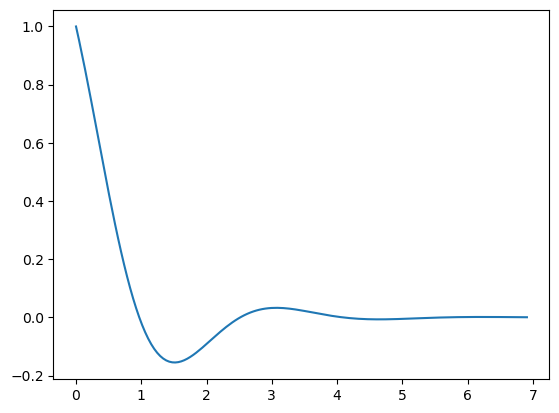

In [7]:
x, y = ct.impulse_response(Y)

plt.plot(x, y)
plt.show()